# MOVIE REVIEW PROJECT

## Introduction

The purpose of this code is to perform sentiment analysis on movie reviews using machine learning techniques. Sentiment analysis, also known as opinion mining, is a computational approach that aims to determine the sentiment or emotional tone expressed in a piece of text, such as a movie review.

**Background Information:**

In this analysis, we work with two datasets: the IMDB dataset and a test dataset. The IMDB dataset contains a collection of movie reviews along with their associated sentiments (positive or negative). The goal is to train a machine learning model using the IMDB dataset to understand the sentiments expressed in these reviews.

Once the model is trained, it can predict the sentiment of new, unseen movie reviews. The code includes data preprocessing steps, text cleaning, feature extraction using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization, and the utilization of a Random Forest Classifier for sentiment prediction.

By analyzing movie reviews in this way, we can gain insights into the sentiments of viewers, which can be valuable for various applications, including recommendation systems, market research, and understanding audience preferences in the film industry.


In [84]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # Using RandomForest for comparison
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset Loading:

In [86]:
# Load the datasets
imdb_data = pd.read_csv('IMDB Dataset.csv',nrows=35000)
test_data = pd.read_csv('test.csv',nrows=14000)

## sentiment analysis

In [87]:
imdb_data.head()

,review,sentiment
0,This movie really shows its age. The print I s...,negative
1,The title should have been the walker. The guy...,negative
2,Sequels are a capricious lot with most nowhere...,positive
3,I really wish Hollywood would come up with som...,negative
4,I wasn't quite sure if this was just going to ...,positive


In [88]:
imdb_data.shape

(35000, 2)

In [89]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     35000 non-null  object
 1   sentiment  35000 non-null  object
dtypes: object(2)
memory usage: 547.0+ KB


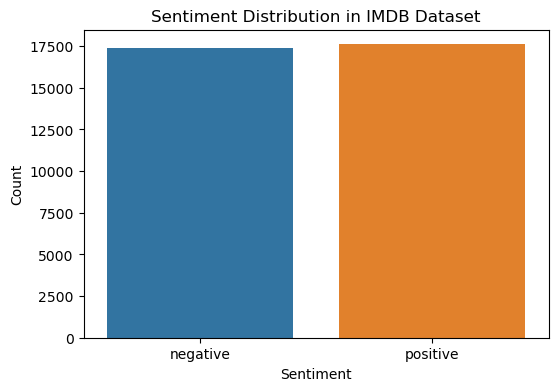

In [90]:
# Plotting sentiment distribution in the IMDB dataset
plt.figure(figsize=(6, 4))
sns.countplot(x=imdb_data['sentiment'])
plt.title('Sentiment Distribution in IMDB Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [91]:
for i in range(5):
    print("Review: ", [i+1])
    print(imdb_data['review'].iloc[i], "\n")
    print("Sentiment: ", imdb_data['sentiment'].iloc[i], "\n\n")

Review:  [1]
This movie really shows its age. The print I saw was terrible due to age, but it is possible that there are better prints out there. However, this was not the major problem with the movie. The problem was that although the film was made in 1933, it was essentially a silent film with only the barest of dialog scattered (only a few sentences) in the film in the most amateur fashion. Sometimes the characters' backs were turned or they were talking with their hands over their faces--all in a pathetic attempt to obscure their lips and "cleaverly" (?) hide the fact that the film was dubbed. Well, its true that this Czech film would need to be dubbed into many languages but to do it this way was really stupid and obvious. It just looked cheap.<br /><br />Overall, the film looked low budget and silly. It's really a shame though, because there was a grain of a good story--a young woman who marries an older man who is either gay and/or has no interest in women. But in the 21st centu

## Data Preprocessing

1. Lowercasing
2. Removing HTML Tags
3. Removing URLs
4. Removing Special Characters
5. Stopword Removal
6. Lemmatization
7. Negation Handling

In [92]:
# Compile the negation pattern outside the function
negation_pattern = re.compile(r'\b(not|no)\b[\s]+([a-z]+)')

# Improved function for text cleaning and lemmatization
def clean_and_lemmatize_text(text):
    # Lowercasing and removing HTML tags
    text = text.lower()
    text = re.sub('<br />', '', text)

    # Removing URLs and special characters
    text = re.sub(r"https?\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Improved negation handling
    text = negation_pattern.sub(r'\1_\2', text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

In [93]:
# Apply improved cleaning to datasets
imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_and_lemmatize_text)
test_data['cleaned_review'] = test_data['review'].apply(clean_and_lemmatize_text)

## WORLD CLOUD

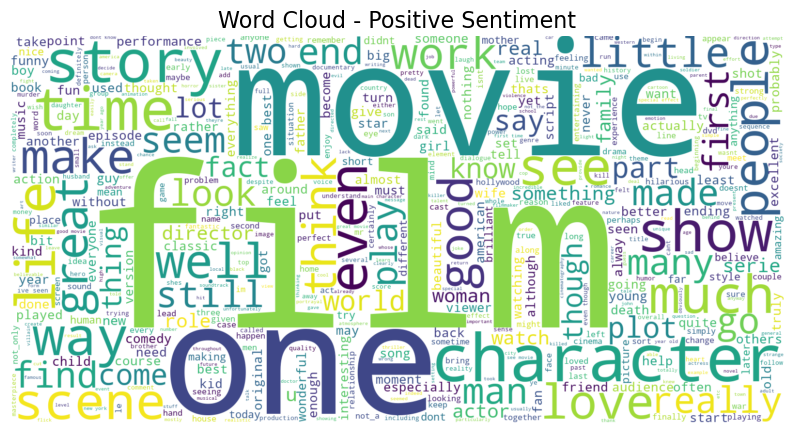

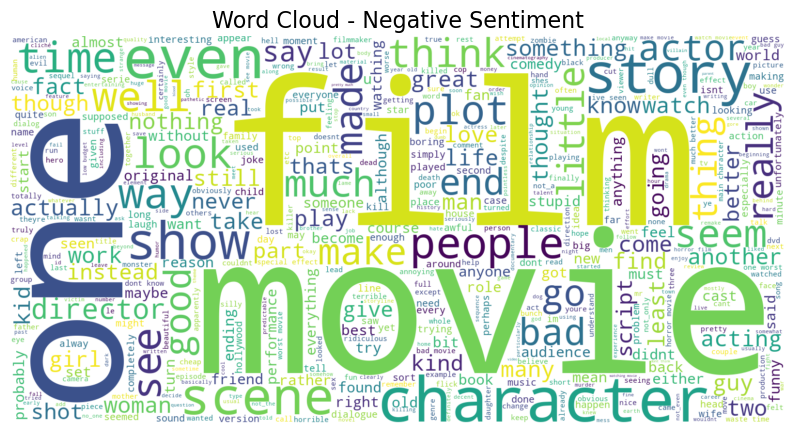

In [94]:
# Assuming `imdb_data` is your DataFrame with 'cleaned_review' and 'sentiment' columns
positive_reviews = imdb_data[imdb_data['sentiment'] == 'positive']
negative_reviews = imdb_data[imdb_data['sentiment'] == 'negative']

# Function to generate word cloud and plot
def generate_wordcloud(data, title):
    text = ' '.join([word for word in data['cleaned_review']])
    wordcloud = WordCloud(max_words=500, width=1600, height=800, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Plot positive sentiment word cloud
generate_wordcloud(positive_reviews, 'Word Cloud - Positive Sentiment')

# Plot negative sentiment word cloud
generate_wordcloud(negative_reviews, 'Word Cloud - Negative Sentiment')

In [95]:
imdb_data.head()

,review,sentiment,cleaned_review
0,This movie really shows its age. The print I s...,negative,movie really show age print saw terrible due a...
1,The title should have been the walker. The guy...,negative,title walker guy expend 90 movie walking doesn...
2,Sequels are a capricious lot with most nowhere...,positive,sequel capricious lot nowhere near stature ori...
3,I really wish Hollywood would come up with som...,negative,really wish hollywood would come new idea quic...
4,I wasn't quite sure if this was just going to ...,positive,wasnt quite sure going another one idiotic nig...


In [96]:
# Convert sentiments to binary
imdb_data['sentiment'] = imdb_data['sentiment'].astype('category')
test_data['sentiment'] = test_data['sentiment'].astype('category')
y_imdb = imdb_data['sentiment'].map({'positive': 1, 'negative': 0}).values
y_test = test_data['sentiment'].map({'positive': 1, 'negative': 0}).values

## Model Building

**Algorithm**: Random Forest Classifier

In [97]:
# Fit TF-IDF Vectorizer once outside the pipeline
tfidf_vectorizer = TfidfVectorizer(max_features=35000, min_df=5, max_df=0.7, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(imdb_data['cleaned_review'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['cleaned_review'])

# Setting up the pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', RandomForestClassifier(n_estimators=100,random_state=42))
])

## Training and Evaluation

### Model Training

The sentiment analysis model is trained on the IMDb dataset using a Random Forest Classifier.

### Evaluation Metrics

- **Accuracy Score**: Measures overall model accuracy.
- **Precision**: Proportion of true positives among positive predictions.
- **Recall**: Proportion of true positives among actual positives.
- **F1-Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Provides detailed true positives, true negatives, false positives, and false negatives.

Interpretation of Metrics:
- **Accuracy**: Higher is better overall.
- **Precision**: Fewer false positives.
- **Recall**: Better identification of positive cases.
- **F1-Score**: Balances precision and recall.
- **Confusion Matrix**: Detailed error analysis.


In [98]:
pipeline.fit(imdb_data['cleaned_review'], y_imdb)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, max_features=35000, min_df=5,
                                 ngram_range=(1, 2))),
                ('classifier', RandomForestClassifier(random_state=42))])

## Results:

In [99]:
# Evaluating the model on the test set
y_pred_test = pipeline.predict(test_data['cleaned_review'])
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_test))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_test))

Accuracy on Test Set: 0.8602142857142857
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      7075
           1       0.86      0.86      0.86      6925

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



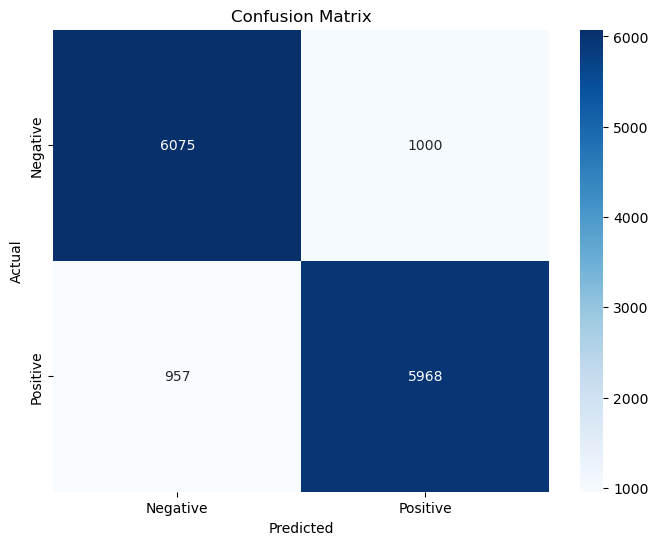

In [100]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## FOR FUTURE PREDICTION

In [101]:
# Function to predict new reviews
def predict_new_review(new_review, pipeline):
    cleaned_review = clean_and_lemmatize_text(new_review)
    return 'positive' if pipeline.predict([cleaned_review])[0] == 1 else 'negative'

In [102]:
# Example usage
new_review = "i found it very heart touching movies of the year"
predicted_sentiment = predict_new_review(new_review, pipeline)
print(f"The predicted sentiment for the new review is: {predicted_sentiment}")

The predicted sentiment for the new review is: positive
